# TITANIC KAGGLE COMPETITION

#### S Sexton
#### May 5, 2020

## Table of Contents

* [1. Project Goal](#project_goal)
* [2. Background Information](#background_info)
* [3. Load Libraries](#libraries)
* [4. Set Working Directory](#directory)
* [5. Load Dataset](#dataset)
* [6. Explore Data](#explore)


# 1. Project Goal <a class="anchor" id="project_goal"></a>
Kaggle has already predefined the project goal as:
- Given a training set which lists passengers who survived or did not survive the Titanic disaster, create a model to determine who survived in the test dataset.

# 2. Background Information <a class="anchor" id="background_info"></a>
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. This may be likely to the prevailing thoughts at the time to save women and children first.

# 3. Acquire Data <a class="anchor" id="acquire"></a>

- This is not necessary since it is supplied by the kaggle competition.

# 4. Load Libraries <a class="anchor" id="libraries">

In [1]:
# have to install any python packages that are missing but all necessary packages are installed

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 5. Set Working Directory <a class="anchor" id="directory"></a>

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\sexto\\titaniccontest')
os.getcwd()

'C:\\Users\\sexto\\titaniccontest'

# 6. Load Dataset <a class="anchor" id="dataset"></a>

In [3]:
# Make code as reproducible as possible which includes where data was downloaded from.
# reading in data with the web link set to a variable is causing problems 

# Instead, manually downloaded titanic data from kaggle website into working directory
# Data downloaded from: https://www.kaggle.com/c/titanic/data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 7. Cursory Exploration <a class="anchor" id="explore"></a>

In [4]:
# training dataframe
# size 
sizeTrain = train_df.size
sizeTest = test_df.size
  
# shape 
shapeTrain = train_df.shape 
shapeTest = test_df.shape

# printing size and shape 
print("SizeTrain = {}\nShapeTrain = {}".
format(sizeTrain, shapeTrain))
print("SizeTest = {}\nShapeTest = {}".
format(sizeTest, shapeTest))

SizeTrain = 10692
ShapeTrain = (891, 12)
SizeTest = 4598
ShapeTest = (418, 11)


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### Observations

#### From size
- train_df has the extra column "Survived"

#### From info
- INTEGERS: PassengerId, Survived, PClass, SibSp, Parch
- OBJECT: Name, Sex, Ticket, Cabin, Embarked
- FLOAT: Age, Fare

#### From describe
- min age is 0.42 which seems small but could indicate a baby
- max age is 80 which seems about right
- extremely high far of 512 which could indicate more than one person on the ticket
- ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

2. Age is missing 891-714 = 177 variables.
3. Cabin seems to have a lot of nan values.
4. Type of variable
    - int64: PassengerId, Survived, Pclass, SibSp, Parch
    - object: Name, Sex, Ticket
    - float64: Age, Fare

#### Thing to change

#### Variable Type
- Look at the given description of the column names (OR search the web to determine what the variable means) to determine if the type of variable is appropriate or should be changed.
- Type of variables are:
    integer
    factor
    object
    float64
    
- Survived is either 0 or 1 so should set as category
- Pclass is either 1 or 2 or 3 so should set as category
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names
- Ticket is a mix of numeric and alphanumeric data types
- Cabin is alphanumeric
- add "Survived" column in test_df if merging to train_df
    

# 8. Secondary Cleaning of Data

Take a look at the data to determine: 
- missing values
- high/ low
- inappropriate
- type of values
- categorical/ numerical, etc. 
- see if some columns have too many missing values and possibly remove them, look for duplicates

##### Combine train and test dataframes in order to clean up both

In [10]:
# Combine train and test dataset by adding Survived column to test dataset and with NaN
# Combine them so can clean data and feature engineer
combined_df =  pd.concat(objs=[train_df, test_df], axis=0, sort=False).reset_index(drop=True)
combined_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##### Determine if duplicates by examining the Name value

In [140]:
# Example names in Name column
combine_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [162]:
# Select all duplicate rows based on one column
# List first instance of duplicate names
duplicateRowsName1 = combine_df[combine_df.duplicated(['Name'], keep='last')]
duplicateRowsName1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.75,NaN,Q,1.0
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,NaN,S,2.0


In [168]:
# List subsequent instances of duplicate names
duplicateRowsName2 = combine_df[combine_df.duplicated(['Name'])]
sortName = duplicateRowsName2.sort_values(by=['Name'])
sortName

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN


Upon examining the duplicate names, it appears that both are actually unique people since they have different ages and ticket numbers. These duplicate names will NOT be removed.
# --------------------------------------------------------------------------------------------

In [170]:
# Determines any duplicates based on all columns
duplicateRowsDF = combine_df[combine_df.duplicated(keep='first')]
duplicateRowsDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


There are no duplicates based on ALL columns.

# 9. Visualizations to understand the data in depth
Explore variables in dataset to gain an understanding of the data.

##### Question - Did more females survive than males?
- Typically, the protocol aboard ships was to save women and children first.

In [75]:
# Are there any null values?
null_Survived = train_df["Survived"].isnull().sum()
print("Missing values for Survived are:", null_Survived)
null_Sex = train_df["Sex"].isnull().sum()
print("Missing values for Sex are:", null_Sex)

Missing values for Survived are: 0
Missing values for Sex are: 0


Ensure there are an adequate number of males and females who survived & didn't survive.
      Sex  Survived  PassengerId
0  female         0           81
1  female         1          233
2    male         0          468
3    male         1          109
The lowest number is 81 which is adequate for comparison.


Probability for Survival for males and females:
      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0, 0.5, 'survival probabilty')

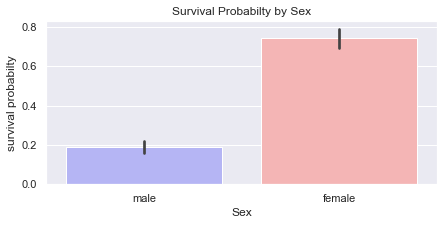

In [115]:
print("Ensure there are an adequate number of males and females who survived & didn't survive.")
# PassengerId was used because it has no missing values 
sextest1 = train_df[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived'], as_index=False).count()
print(sextest1)
print('The lowest number is 81 which is adequate for comparison.')
print('')
print('')
print('Probability for Survival for males and females:')
sextest = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sextest)

sns.set(rc={'figure.figsize':(7,3)})
g = sns.barplot(x="Sex",y="Survived",data=train_df, palette="bwr").set_title("Survival Probabilty by Sex")
plt.ylabel("survival probabilty")

##### Observation
- Significantly more females than males survived
# --------------------------------------------------------------------------------------------

##### Question - Did rich people survive at higher rate than poor people?
- Pclass is ticket class and typically rich people will buy a higher class ticket than poor people
- Pclass 1 the is highest & most expensive class with Pclass 3 being the lowest & cheapest class

In [76]:
# Are there any null values?
null_Pclass = train_df["Pclass"].isnull().sum()
print("Missing values for Pclass are:", null_Pclass)

Missing values for Pclass are: 0


Ensure there are an adequate number of values for Survived in each Pclass to allow for reliable comparison.
   Pclass  Survived  PassengerId
0       1         0           80
1       1         1          136
2       2         0           97
3       2         1           87
4       3         0          372
5       3         1          119
The lowest number is 80 which is adequate for comparison.


Probability for Survival in each class (with 1 being 1st class) is as follows:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


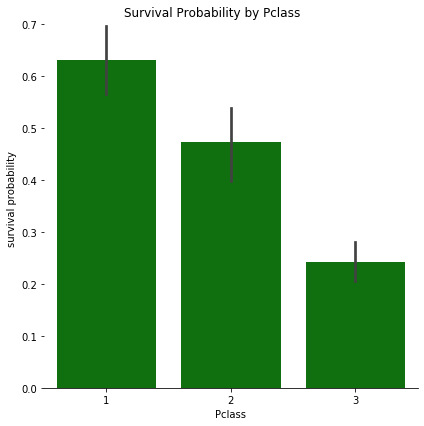

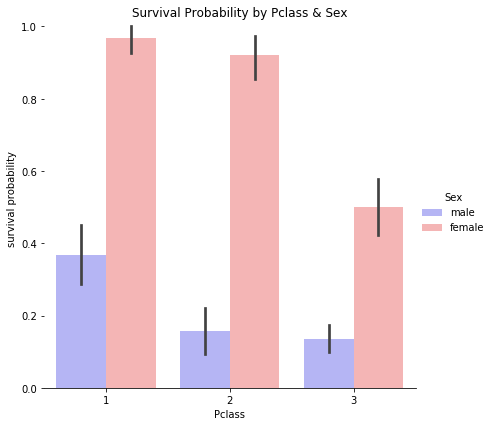

In [46]:
print("Ensure there are an adequate number of values for Survived in each Pclass to allow for reliable comparison.")
# PassengerId was used because it has no missing values 
Pclasstest2 = train_df[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived'], as_index=False).count()
print(Pclasstest2)
print('The lowest number is 80 which is adequate for comparison.')
print('')
print('')
print('Probability for Survival in each class (with 1 being 1st class) is as follows:')
Pclasstest = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(Pclasstest)

# Explore Pclass vs Survived
g = sns.factorplot(x="Pclass",y="Survived",data=train_df,kind="bar", size = 6 , 
color = "green")
g.despine(left=True)
g = g.set_ylabels("survival probability")
g = g.fig.suptitle("Survival Probability by Pclass")

# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
                   height=6, kind="bar", palette="bwr")
g.despine(left=True)
g = g.set_ylabels("survival probability")
g = g.fig.suptitle("Survival Probability by Pclass & Sex")

##### Observation
- 1st class survival rate is better than 2nd class and 2nd class is better than 3rd class
- Females overall have a much better chance of surviving
- 1st class males and females have a better chance of surviving than lower class
# --------------------------------------------------------------------------------------------

##### Questions - Did title matter?

In [57]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
train_df["Title"] = pd.Series(dataset_title)
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

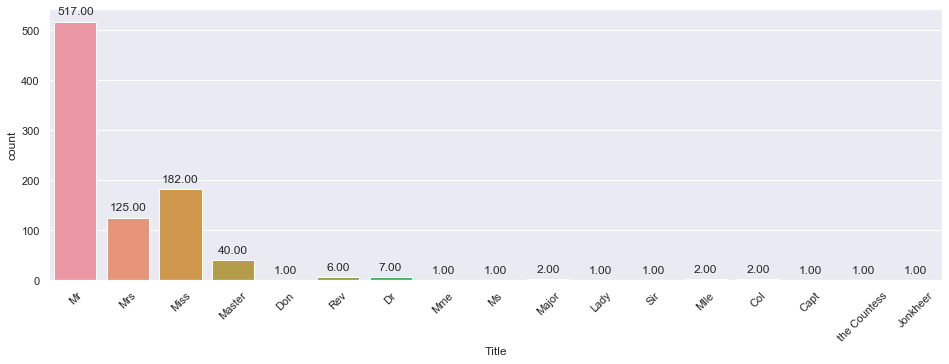

In [102]:
# Count how many of each title there are
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(x="Title",data=train_df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = plt.setp(g.get_xticklabels(), rotation=45)

There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.
Group the following into Mr - 
    Don
    Rev
    Dr
    Major
    Sir
    Col
    Capt
    Jonkheer
Group the following into Mrs -
    Lady
    the Countess
Group the following into Miss
Group the following into Master


In [104]:
# Convert to categorical values Title 
train_df["Title"] = train_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df["Title"] = train_df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train_df["Title"] = train_df["Title"].astype(int)

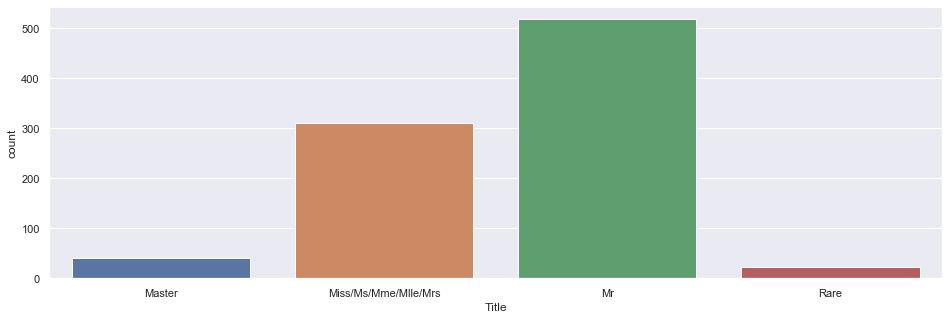

In [106]:
g = sns.countplot(train_df["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

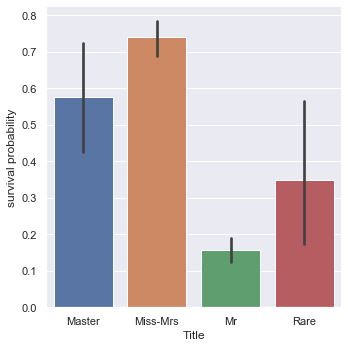

In [111]:
g = sns.factorplot(x="Title",y="Survived",data=train_df,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

##### Question - Did it matter where you embarked from?

In [74]:
# Are there any null values?
null_Embarked = train_df["Embarked"].isnull().sum()
print("Missing values for Embarked are:", null_Embarked)

Missing values for Embarked are: 0


In [65]:
# Fill Embarked nan values with 'S' most frequent value
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [ ]:
# Examine names in both train and test sets
# use unique function to see how many unique names there are
# get the length function as well
# 1307 unique names but expect 1309
# get duplicated names to look at closer
# at 53 mins

In [ ]:
# predictive power with titles Miss, Mr, etc.

In [ ]:
# Need to ensure the data is clean


## Feature Engineering

In [13]:
# Pclass is only 1 of 3 variables so should set as a factor instead of a integer
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset['Survived'] = dataset['Survived'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null category
Pclass         1309 non-null category
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 105.1+ KB


## Correlating
Explore how each feature correlates with Survival. 

## Completing
1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

## Correcting
1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

## Creating
1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.




In [16]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualize Data
Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Text(0.5, 1, 'Survival Rate Based on Age')

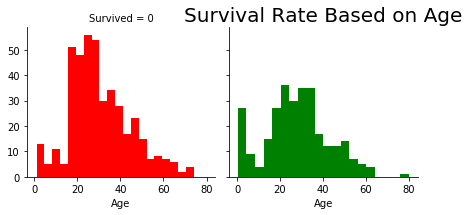

In [18]:
g = sns.FacetGrid(train_df, col='Survived', hue_kws={'color': ['r', 'g']}, hue="Survived")
g.map(plt.hist, 'Age', bins=20)
plt.title('Survival Rate Based on Age', fontsize=20)

#ax1, ax2 = g.axes[0]

#ax1.axhline(10, ls='--')
#ax2.axhline(30, ls='--')

C:\Users\sexto\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Survival Rate Based on Pclass')

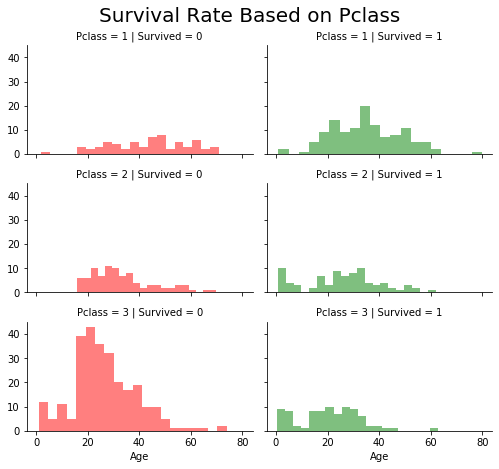

In [19]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6, hue_kws={'color': ['r', 'g']}, hue="Survived")
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Survival Rate Based on Pclass', fontsize=20)

In [42]:
pd.concat(g for _, g in train_df.groupby("Age") if len(g) > 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,0,1,"Millet, Mr. Francis Davis",male,65.00,0,0,13509,26.5500,E38,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.00,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C


In [49]:
df1 = train_df[train_df['Name'].str.contains("Miss") | train_df['Name'].str.contains('Ms')] 
df1[['Survived', 'Pclass', 'Name']]

,Survived,Pclass,Name
2,1,3,"Heikkinen, Miss. Laina"
10,1,3,"Sandstrom, Miss. Marguerite Rut"
11,1,1,"Bonnell, Miss. Elizabeth"
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina"
22,1,3,"McGowan, Miss. Anna ""Annie"""
...,...,...,...
866,1,2,"Duran y More, Miss. Asuncion"
875,1,3,"Najib, Miss. Adele Kiamie ""Jane"""
882,0,3,"Dahlberg, Miss. Gerda Ulrika"
887,1,1,"Graham, Miss. Margaret Edith"


In [63]:
pip install string

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [67]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    print(big_string)
    return np.nan

In [76]:
features = ['Pclass', 'Age', 'Fare']
features_str = ['Sex'] # will be converted

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str(big_string).find(substring) != -1:
            return substring
    #print (big_string)
    return np.nan

title_list= ["Mr.", "Mrs.", "Ms", "Miss", "Master", "Rev", "Dr", "Mlle", "Col", "Countess", "Capt.", "Don", "Major", "Jonkheer", "Mme"]

train_df['Title'] = train_df['Name'].map(lambda x: substrings_in_string(x, title_list))
test_df['Title'] = test_df['Name'].map(lambda x: substrings_in_string(x, title_list))

features_str.append('Title')

In [78]:
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_df['Deck']=train_df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
test_df['Deck']=test_df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [81]:
# check to ensure title is correct, had to add a period after Mr since Mrs was showing up as Mr
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,NaN


In [82]:
# check if there are still null
print("---->", train_df.Title.value_counts(dropna=False),  train_df.Name[train_df.Title.isnull()], train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          889 non-null object
Deck           204 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB
----> Mr.         517
Miss        182
Mrs.        125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
NaN           2
Don           1
Jonkheer      1
Ms            1
Mme           1
Capt.         1
Countess      1
Name: Title, dtype: int64 556    Duff Gordon, Lady. (Lucille Christiana Sutherl...


In [99]:
# Group similar titles
# Under Mr. (older man) are: Dr, Rev, Major, Col, Capt., Don, Jonkheer
# Under Master (young man) are: no other
# Under Mrs (older woman) are: Mme
# Under Miss (younger woman) are: Ms, Mlle
# Under NaN: no other
# Add TitleCombine column which combines above titles

#data = [train_df, test_df]
#titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "NaN": 5}

for dataset in data:
    # extract titles, different way than above but risky since must be . after the title 
    # dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    train_df['TitleCombined'] = train_df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt.', 'Don', 'Jonkheer'], 'Mr.')
    train_df['TitleCombine'] = train_df['Title'].replace('Mme', 'Mrs')
    train_df['TitleCombine'] = train_df['Title'].replace(['Ms', 'Mlle'],'Miss')
# ensure replaced (it didn't replace before because i replaced it once so need to delete the TitleCombine column and redo)
check = train_df.loc[train_df['Title'] == 'Dr']
check.head(n=15)
    # convert titles into numbers
    #dataset['TitleCombine'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    #dataset['Title'] = dataset['Title'].fillna(0)
#train_df = train_df.drop(['Name'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TitleCombine,TitleCombined
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr,C,Dr,Mr.
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr,NaN,Dr,Mr.
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr,NaN,Dr,Mr.
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr,B,Dr,Mr.
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr,NaN,Dr,Mr.
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Dr,NaN,Dr,Mr.
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr,D,Dr,Mr.


C:\Users\sexto\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


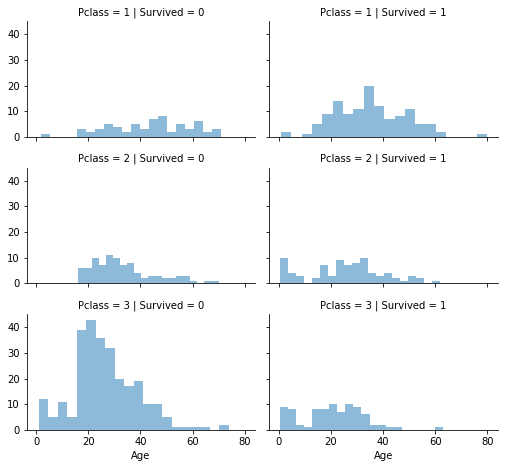

In [84]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'TitleCombine', alpha=.5, bins=20)
grid.add_legend();

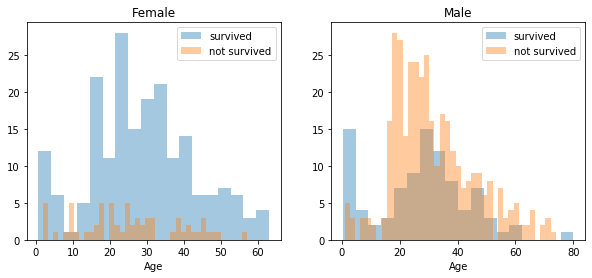

In [85]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')